In [31]:
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
import numpy as np


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


In [32]:
tf.random.set_seed()

AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

In [39]:

    def print_model_history(history):
        '''
            print model training history
        '''
        # list all data in history
        print(history.history.keys())
        # summarize history for accuracy
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [33]:
new_image = cv2.imread("data/RAW/train/bear/0001.png")
print(new_image.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [34]:
TRAIN_BASE_DIRECTORY = "./data/test/train"
TEST_BASE_DIRECTORY = "./data/test/test"


image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.5)


TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 64

In [35]:
#apple model
train_generator = image_data_generator.flow_from_directory(
    TRAIN_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

validation_generator = image_data_generator.flow_from_directory(
    TEST_BASE_DIRECTORY,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=5)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### model de base

In [36]:
#apple model
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='relu'))


model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
model.add(Dense(32, activation='relu'))

#Fin obligatoire
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_9 (Dense)              (None, 16, 16, 32)        1056      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
dense_10 (Dense)             (None, 16, 16, 32)        1056      
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

### model enrichi pour les pommes

In [69]:
#bear model
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3))) # 5 ou 7 au dessus de 128
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dense(32, activation='relu'))

model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same'))
model.add(Dense(64, activation='relu'))

model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
model.add(Dense(128, activation='relu'))

#Fin obligatoire
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dense_51 (Dense)             (None, 32, 32, 32)        544       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
dense_52 (Dense)             (None, 32, 32, 128)       8320      
_________________________________________________________________
flatten_17 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_53 (Dense)             (None, 2)               

Epoch 1/15
2/2 [==============================] - 4s 2s/step - loss: 298.5614 - acc: 0.4500 - val_loss: 252.8036 - val_acc: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 455ms/step - loss: 187.2064 - acc: 0.5000 - val_loss: 33.8704 - val_acc: 0.5000
Epoch 3/15
2/2 [==============================] - 1s 456ms/step - loss: 27.2879 - acc: 0.5000 - val_loss: 70.7553 - val_acc: 0.5000
Epoch 4/15
2/2 [==============================] - 1s 434ms/step - loss: 63.2317 - acc: 0.5000 - val_loss: 0.9449 - val_acc: 0.8500
Epoch 5/15
2/2 [==============================] - 1s 438ms/step - loss: 13.1984 - acc: 0.7750 - val_loss: 41.7203 - val_acc: 0.5000
Epoch 6/15
2/2 [==============================] - 1s 448ms/step - loss: 35.1109 - acc: 0.5000 - val_loss: 0.8967 - val_acc: 0.9000
Epoch 7/15
2/2 [==============================] - 1s 424ms/step - loss: 5.1097 - acc: 0.8500 - val_loss: 11.9325 - val_acc: 0.5000
Epoch 8/15
2/2 [==============================] - 1s 442ms/step - loss: 12.2809

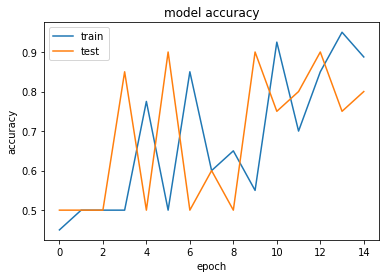

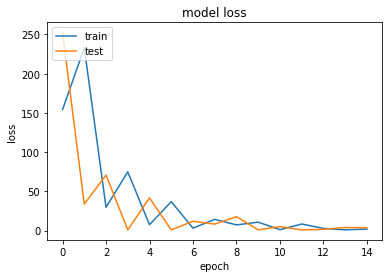

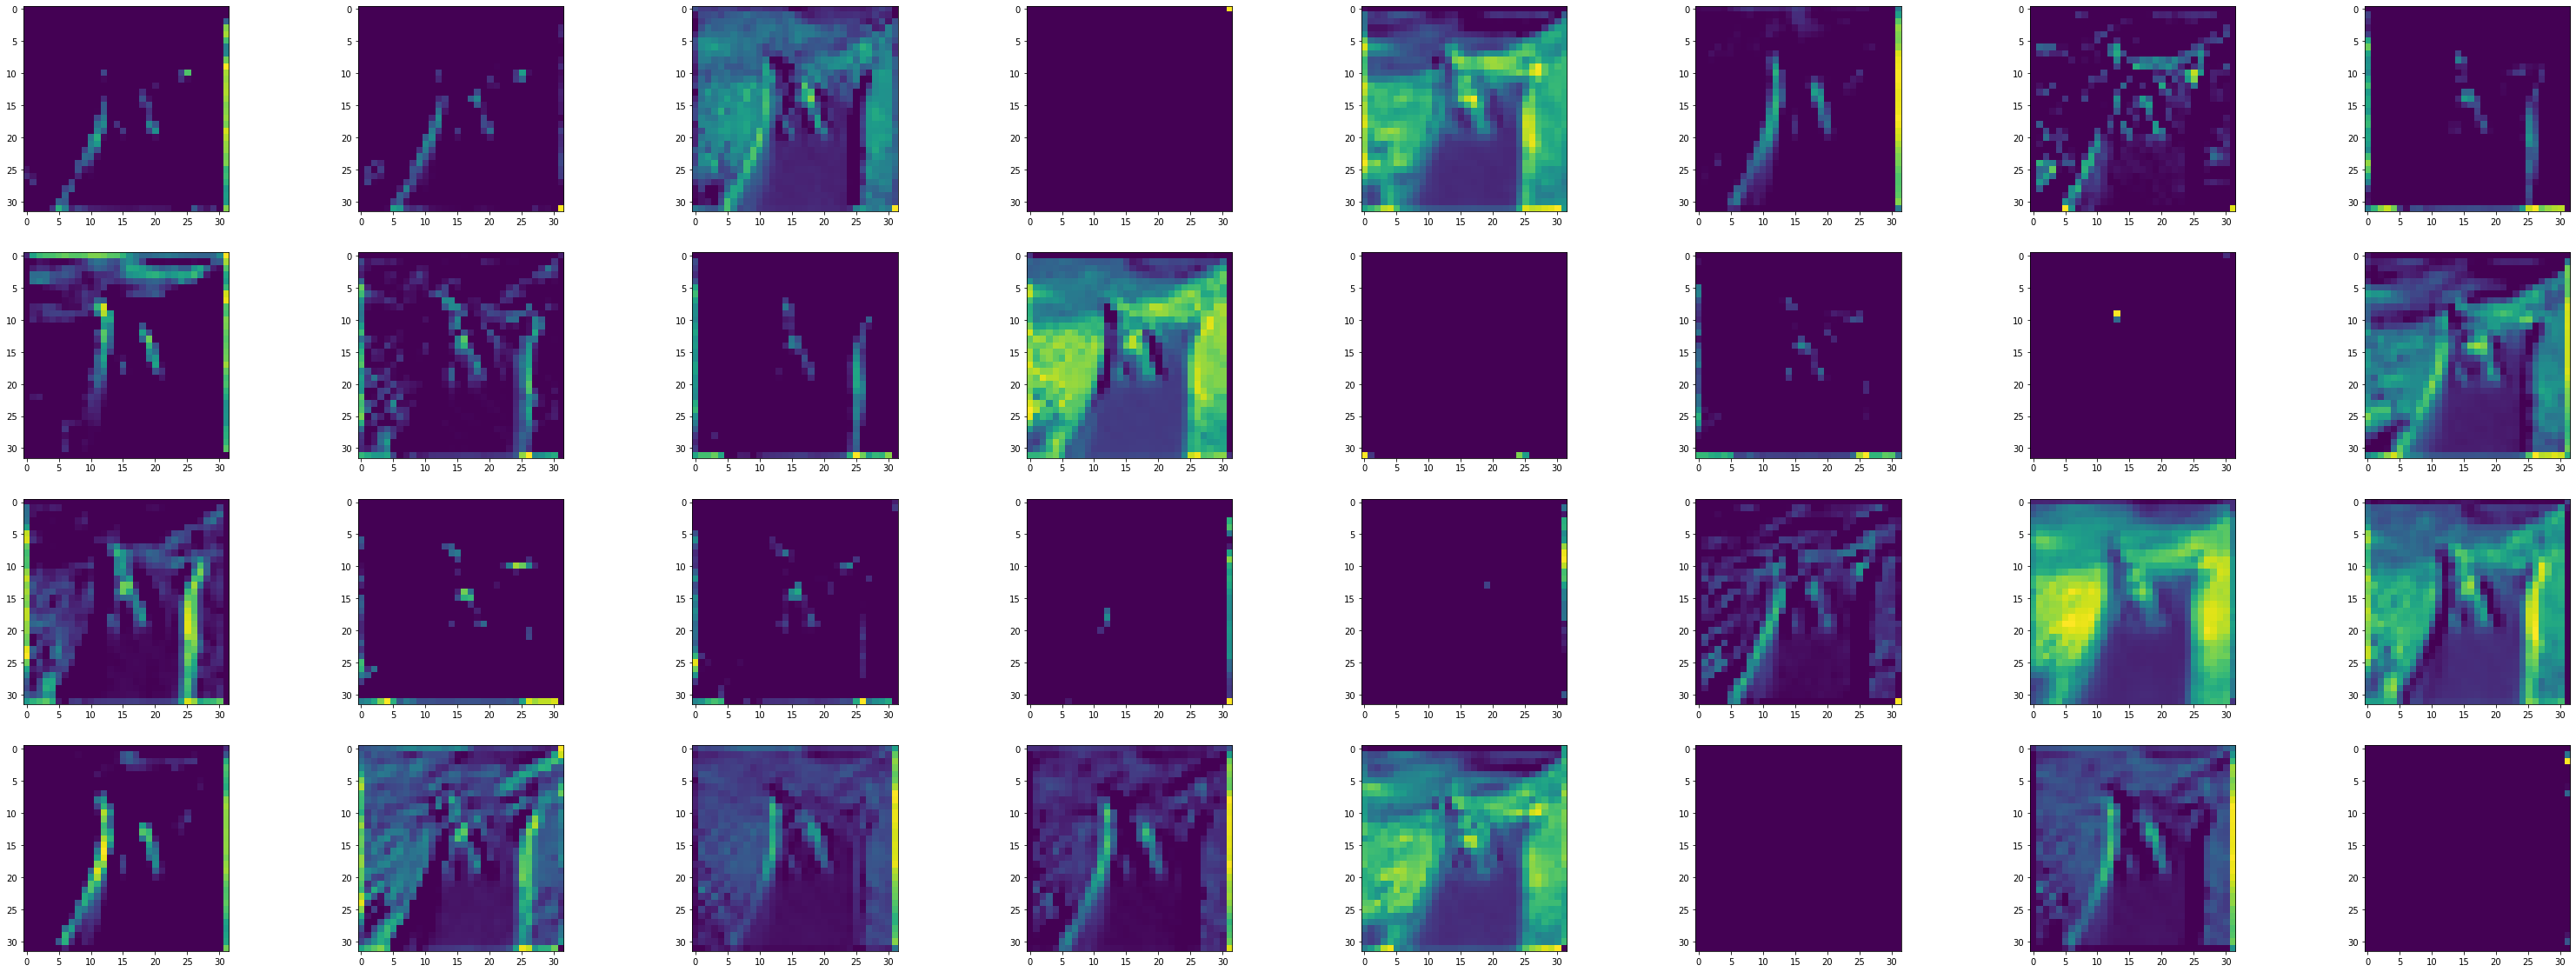

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=100, validation_data=validation_generator, shuffle=False)
print_model_history(history)

layer_outputs = [layer.output for layer in model.layers]

test_image = "./data/test/test/rocket/0082.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

display_activation(activations, 8, 4, 3)